## Introduction to Perceptrons

A perceptron is the simplest type of artificial neuron used in machine learning. It computes a weighted sum of its inputs and optionally applies an activation function. Perceptrons are the building blocks of neural networks.

The perceptron can be used for:
1. **Linear Regression:** No activation function is applied.
2. **Classification:** An activation function like sigmoid is used.

### Perceptron Diagram
Below is the architecture of a single perceptron:
![Perceptron](img/perceptron.png)

In [52]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.callbacks import LambdaCallback

### Neuron without activation - Linear Regression Model

We will do a Simple Linear Regression, i.e. a simple perceptron without the activation function

In [53]:
# Set random seed for reproducibility
np.random.seed(42)

# Linear Regression Data Generation
# X_train has 10 samples and 4 features
X_train = np.random.rand(10, 4)

# Define true weights and bias for the linear model
weights = np.array([10, 3, 5, 8])
bias = 2.5

# Generate the target values using a linear equation: y = Xw + b
y_train = np.dot(X_train, weights) + bias
# Display the generated data
print(f"Input features (X_train):\n{X_train}\n")
print(f"Target values (y_train):\n{y_train}\n")

Input features (X_train):
[[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451]
 [0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378 0.51423444]
 [0.59241457 0.04645041 0.60754485 0.17052412]
 [0.06505159 0.94888554 0.96563203 0.80839735]
 [0.30461377 0.09767211 0.68423303 0.44015249]]

Target values (y_train):
[17.54678169 11.74799719 18.49756914 13.83780465 11.60624994 13.42862852
 14.52847214 12.96541418 17.29251149 12.78153912]



Define a layer with one neuron

In [54]:
# Define the model
perceptron = Sequential()
# Adding a dense layer with 1 output unit (for regression) and linear activation
perceptron.add(Input(shape=(X_train.shape[1],)))
perceptron.add(Dense(units=1, activation='linear'))

Let's examine the weights

In [55]:
perceptron.get_weights()

[array([[-0.37475795],
        [-0.47315127],
        [ 0.3328954 ],
        [-0.80698836]], dtype=float32),
 array([0.], dtype=float32)]

There are not weights as the weights are not yet instantiated. 

In [56]:
w, b = perceptron.get_weights()
print(f'w = {w}\n\nb = {b}')

w = [[-0.37475795]
 [-0.47315127]
 [ 0.3328954 ]
 [-0.80698836]]

b = [0.]


These weights are randonmly initialized to samll numbers and the bias default to being initialized to zero.

#### Train the model

In [57]:
# Perform a forward pass to see the predictions (before training)
predictions = perceptron(X_train).numpy()
print(f"Predictions (before training):\n{predictions}\n")

Predictions (before training):
[[-0.82962656]
 [-0.8119365 ]
 [-1.3361516 ]
 [-0.4999096 ]
 [-0.45353237]
 [-0.49369457]
 [-0.89093363]
 [-0.17935222]
 [-0.80425775]
 [-0.28779003]]



In [58]:
# Define the callback to print the progress every 100 epochs
print_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}: loss = {logs['loss']}")
    if (epoch + 1) % 100 == 0 else None
)

In [59]:
# Compile the model with Mean Squared Error loss and Adam optimizer
perceptron.compile(optimizer=Adam(learning_rate=0.1), loss=MeanSquaredError())
# Train the model on the generated data
perceptron.fit(X_train, y_train, epochs=500, verbose=0, callbacks=[print_callback])

Epoch 100: loss = 1.3069307804107666
Epoch 200: loss = 0.6260364055633545
Epoch 300: loss = 0.3362300395965576
Epoch 400: loss = 0.2431069314479828
Epoch 500: loss = 0.20862917602062225


In [60]:
# Get the learned weights and bias after training
trained_weights, trained_bias =perceptron.layers[0].get_weights()
print(f"Trained weights:\n{trained_weights}")
print(f"Trained bias: {trained_bias}")

Trained weights:
[[7.1404524]
 [3.7210674]
 [3.3905118]
 [5.496767 ]]
Trained bias: [5.405077]


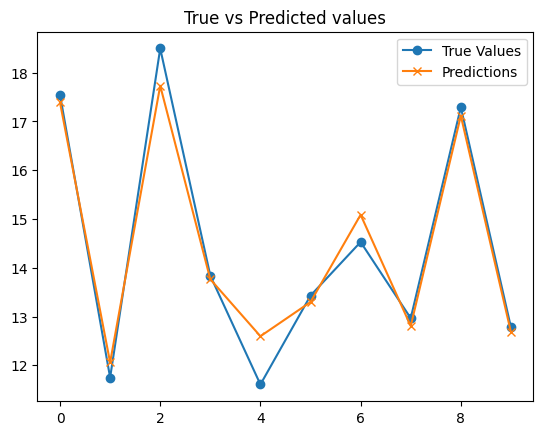

In [61]:
# Plot the model predictions vs actual values
predictions_after_training = perceptron(X_train).numpy()
plt.plot(y_train, label='True Values', marker='o')
plt.plot(predictions_after_training, label='Predictions', marker='x')
plt.legend()
plt.title("True vs Predicted values")
plt.show()

## Neuron with Sigmoid Activation
The fucntion implemented by a neuron with a sigmoid activaction is the same as doing logistic regression

In [62]:
# Define the training data
X_train = np.array([0, 1, 2, 3, 4, 5]).reshape(-1, 1)  # Ensure X_train has shape (6, 1)
y_train = np.array([0, 0, 0, 1, 1, 1])  # Corrected labels to match the binary classification

In [70]:
# Define the model
model = Sequential([
    Input(shape=(1,)),  # Input layer: expects data with 1 feature per sample
    Dense(1, activation='sigmoid', name='L1')  # Single neuron with sigmoid activation (binary classification)
])
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.1), loss=BinaryCrossentropy(), metrics=['accuracy'])
# Display the model summary
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Get the weights and biases of the logistic layer (after compilation)
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(f"Weights: {w}\nBias: {b}\n")
print(f"Weight shape: {w.shape}, Bias shape: {b.shape}")

Weights: [[1.5127991]]
Bias: [0.]

Weight shape: (1, 1), Bias shape: (1,)


In [71]:
# Train the model (fit it to the data)
model.fit(X_train, y_train, epochs=100, verbose=0, callbacks=[print_callback])

Epoch 100: loss = 0.12443352490663528


In [72]:
# Get the model's learned weights and bias after training
logistic_layer = model.get_layer('L1')
w_trained, b_trained = logistic_layer.get_weights()
print(f"Trained Weights: {w_trained}\nTrained Bias: {b_trained}\n")

Trained Weights: [[2.0353441]]
Trained Bias: [-4.8016024]



In [73]:
# Predict using the model for all inputs in X_train
predictions = model.predict(X_train)
print(f"Predictions: {predictions}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predictions: [[0.00814961]
 [0.05917498]
 [0.32499418]
 [0.7865796 ]
 [0.9657684 ]
 [0.99539095]]



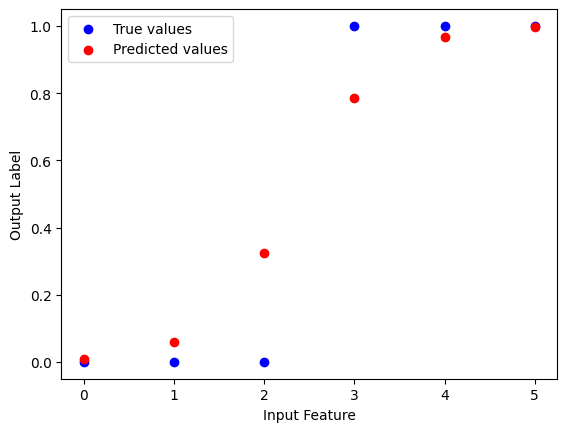

In [74]:
# Display the predictions and compare them with true labels
plt.scatter(X_train, y_train, color='blue', label='True values')
plt.scatter(X_train, predictions, color='red', label='Predicted values')
plt.xlabel('Input Feature')
plt.ylabel('Output Label')
plt.legend()
plt.show()